In [16]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1) DATOS -> 2 opciones
- NumPy arrays -> Para cuando tus datos caben en memoria.
- tf.data.Dataset -> Para cuando tus datos no caben en memoria.

In [2]:
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()

In [3]:
type(x_train), x_train.shape, x_val.shape

(numpy.ndarray, (60000, 28, 28), (10000, 28, 28))

In [4]:
x_train[0, :12, :12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139]],
      dtype=uint8)

# 2) MODELO -> 3 opciones:

- [Sequential API](https://keras.io/guides/sequential_model): Facil, pero muy limitada
- [Functional API](https://keras.io/guides/functional_api):
- [Subclassing API](https://keras.io/guides/making_new_layers_and_models_via_subclassing) 
(al estilo de Pytorch)

### [Sequential API](https://keras.io/guides/sequential_model)

In [5]:
model = keras.Sequential([
    layers.Dense(2, activation="relu", name="layer1"),
    layers.Dense(3, activation="relu", name="layer2"),
    layers.Dense(4, name="layer3")
])

### [Functional API](https://keras.io/guides/functional_api)

In [6]:
inputs = keras.Input(shape=(28, 28))
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs, name="my_model")

### [Subclassing API](https://keras.io/guides/making_new_layers_and_models_via_subclassing)

### Visualizar modelo

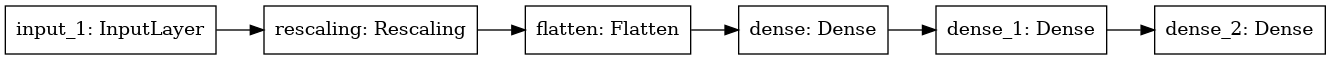

In [7]:
keras.utils.plot_model(model, rankdir="LR")

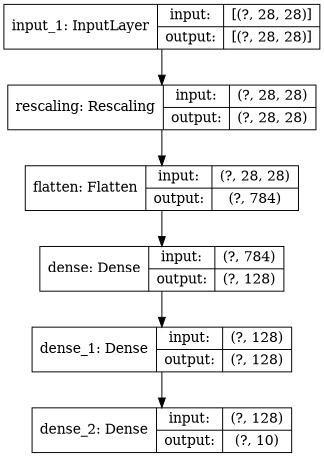

In [8]:
keras.utils.plot_model(model, rankdir="TB", show_shapes=True, dpi=70)

In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
____________________________________________________

# MODELOS + DATOS -> Probar que el modelo funciona

In [8]:
x = x_train[:1]

print("Shape:", x.shape)
print("DType:", x.dtype)

Shape: (1, 28, 28)
DType: uint8


In [9]:
y = model(x)
y

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.06198918, 0.08742506, 0.10458416, 0.12498043, 0.089781  ,
        0.08932189, 0.09910054, 0.11317774, 0.1459287 , 0.08371133]],
      dtype=float32)>

### Las redes nueronales pueden procesar varias muestras a la vez

In [10]:
x = x_train[:3]

print("Shape:", x.shape)

Shape: (3, 28, 28)


In [11]:
# Call model on a test input

y = model(x)
y

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.06198918, 0.08742505, 0.10458414, 0.12498043, 0.08978099,
        0.08932188, 0.09910053, 0.11317772, 0.14592867, 0.08371133],
       [0.07180883, 0.10712647, 0.05957877, 0.11652745, 0.09592227,
        0.07733663, 0.06935543, 0.12488113, 0.16379288, 0.1136702 ],
       [0.08475307, 0.12510307, 0.10667753, 0.10096007, 0.08332912,
        0.06778661, 0.09362334, 0.13338289, 0.12033099, 0.08405323]],
      dtype=float32)>

# Compilar modelo = Elegir [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/) y [metric](https://keras.io/api/metrics)
El Loss y el  optimizer se pueden especificar con strings.

### [Losses](https://keras.io/api/losses/)

- Para regresión:
  - MeanSquaredError
- Para clasificación binaria:
  - BinaryCrossentropy
- Para clasificación multiclase:
  - CategoricalCrossentropy (para cuando el label es un one-hot)
  - SparseCategoricalCrossentropy (para cuando el label es un entero)
  
### [Optimizers](https://keras.io/api/optimizers/)

Adam es un buen optimizador, si no sabes cual usar, usa este.

Lo más importante de cualquier optimizador es el **learning rate**

- `keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)`

### [Metrics](https://keras.io/api/metrics)

In [12]:
model.compile(optimizer = "adam",
              loss      = "sparse_categorical_crossentropy",
              metrics   = ['accuracy'])

# Entrenar modelo
- Opcion simple con `model.fit()`.
- Opción manual al estilo Pytorch

### Opción simple usando numpy arrays

In [13]:
history = model.fit(x_train, y_train,                # Datos de entrenamineto
                    validation_data=(x_val, y_val),  # Datos de validación
                    epochs=5,                        # Veces que entrena los datos de entr.
                    batch_size=32)                   # Numero de muestras de golpe

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2342 - accuracy: 0.9310 - val_loss: 0.1252 - val_accuracy: 0.9617
Epoch 2/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.1003 - accuracy: 0.9695 - val_loss: 0.0853 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 2s 986us/step - loss: 0.0709 - accuracy: 0.9777 - val_loss: 0.0891 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 2s 995us/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.1103 - val_accuracy: 0.9691
Epoch 5/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.0418 - accuracy: 0.9860 - val_loss: 0.0813 - val_accuracy: 0.9777


In [17]:
print(history.history)

{'loss': [0.23418980836868286, 0.10031364858150482, 0.07090168446302414, 0.050120387226343155, 0.041808560490608215], 'accuracy': [0.9310333132743835, 0.9694833159446716, 0.9776833057403564, 0.9840499758720398, 0.9860166907310486], 'val_loss': [0.12522636353969574, 0.08534867316484451, 0.0891287624835968, 0.11033068597316742, 0.08126040548086166], 'val_accuracy': [0.9617000222206116, 0.9740999937057495, 0.9753000140190125, 0.9690999984741211, 0.9776999950408936]}


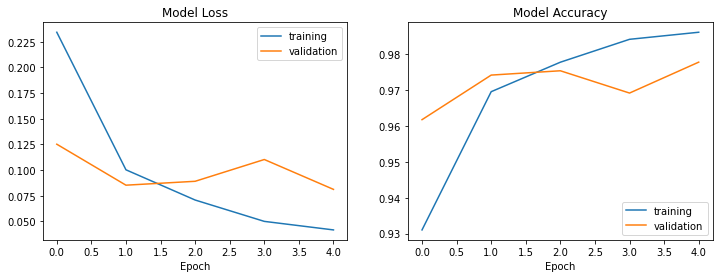

In [18]:
fig = plt.figure(figsize=(12,4))

subfig = fig.add_subplot(121)
subfig.plot(history.history['loss'],     label="training")
subfig.plot(history.history['val_loss'], label="validation")
subfig.set_title('Model Loss')
subfig.set_xlabel('Epoch')
subfig.legend(loc='upper right')

subfig = fig.add_subplot(122)
subfig.plot(history.history['accuracy'],     label="training")
subfig.plot(history.history['val_accuracy'], label="validation")
subfig.set_title('Model Accuracy')
subfig.set_xlabel('Epoch')
subfig.legend(loc='lower right')

plt.ioff()

### Opción simple usando datasets
El dataset ya sabe "batchear" los datos, asi que no hace falta poner el `batch_size` en el `model.fit()`

In [ ]:
history = model.fit(train_dataset,               # Datos de entrenamineto
                    validation_data=val_dataset, # Datos de validación
                    epochs=5)                    # Veces que entrena los datos de entr.

### Opción para tener algo de control: Usar [Callbacks](https://keras.io/api/callbacks/)
Callbacks utiles:
- `ModelCheckpoint`: Guardar el modelo cada X epochs (útil si tarda mucho en entrenar).
- `TensorBoard`: Monitorización en tiempo real del entrenamiento en [tensorboard](https://www.tensorflow.org/tensorboard) 
- Incluso puedes crear [tu propio callback](https://keras.io/guides/writing_your_own_callbacks/)

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath='path/to/my/model_{epoch}', save_freq='epoch'),  
  keras.callbacks.TensorBoard(log_dir='./logs')
]

model.fit(dataset, epochs=2, callbacks=callbacks)

### [Opción manual](https://keras.io/guides/writing_a_training_loop_from_scratch/) al estilo Pytorch para tener 100% control del entrenamiento

In [8]:
optimizer = tf.keras.optimizers.Adam()    # Prepare an optimizer.
loss_fn   = tf.keras.losses.kl_divergence # Prepare a loss function.

for inputs, targets in dataset: # Iterate over the batches of a dataset.
    
    with tf.GradientTape() as tape:     # Open a GradientTape.
        preds = model(inputs)           # 1. Forward pass.
        loss  = loss_fn(targets, preds) # 2. Compute the loss value.
    grads = tape.gradient(loss, model.trainable_weights) # 3. Get gradients of the weights.
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) # 4. Update the weights.

# Utilizar modelo

In [35]:
model(x_val)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[2.73863523e-04, 4.45597976e-07, 2.05407152e-03, ...,
        9.92726445e-01, 2.37367094e-05, 3.27251706e-04],
       [1.26593991e-03, 1.93649539e-05, 9.90123689e-01, ...,
        6.26450491e-09, 7.38092349e-04, 8.27372215e-09],
       [1.15412358e-05, 9.80216801e-01, 6.74970308e-03, ...,
        3.93324066e-03, 2.86897784e-03, 4.06633510e-04],
       ...,
       [2.07549775e-07, 1.11216885e-07, 6.51662776e-06, ...,
        1.96958325e-04, 1.54678512e-03, 4.95184353e-03],
       [1.41040000e-04, 1.80652874e-04, 1.21174826e-05, ...,
        8.74892066e-06, 5.93455601e-03, 2.66496536e-05],
       [1.09864141e-05, 6.10545792e-09, 1.89575047e-04, ...,
        9.63195856e-10, 1.31110187e-06, 6.69207934e-09]], dtype=float32)>

In [36]:
model.predict(x_val)

array([[2.73863523e-04, 4.45597976e-07, 2.05407245e-03, ...,
        9.92726445e-01, 2.37367094e-05, 3.27251706e-04],
       [1.26593991e-03, 1.93649739e-05, 9.90123689e-01, ...,
        6.26450491e-09, 7.38093106e-04, 8.27372215e-09],
       [1.15412477e-05, 9.80216801e-01, 6.74970308e-03, ...,
        3.93324438e-03, 2.86897924e-03, 4.06633917e-04],
       ...,
       [2.07549974e-07, 1.11216885e-07, 6.51663413e-06, ...,
        1.96958150e-04, 1.54678582e-03, 4.95184353e-03],
       [1.41040000e-04, 1.80652874e-04, 1.21174944e-05, ...,
        8.74892885e-06, 5.93456719e-03, 2.66496536e-05],
       [1.09864141e-05, 6.10545792e-09, 1.89574857e-04, ...,
        9.63195856e-10, 1.31110062e-06, 6.69209221e-09]], dtype=float32)

# Guardar modelo

El archivo generdo incluye:
- Arquitectura del modelo
- Los pesos del modelo (que fueron aprendidos durante el entrenamiento)
- La configuración de entrenamineto (los parametros del compile)
- El optimizador con su estado final (por si quieres retomar el entrenamiento)

In [42]:
model.save("mi_modelo")
del model

INFO:tensorflow:Assets written to: mi_modelo/assets


### Cargar modelo

In [43]:
model = keras.models.load_model("mi_modelo")


In [44]:
!ls

'6.1 Fast.ai (adult dataset).ipynb'  'Introdution to Keras.ipynb'   readme.md
 img				      mi_modelo
